### **直方图比较**

* cv.HISTCMP_CORREL 相关法，如果直方图完全一致，则计算值为1；不相关则为0
* cv.HISTCMP_CHISQR 卡方法，如果直方图完全一致，则计算值为1；相似性越低，计算值越大
* cv.HISTCMP_INTERSECT 直方图相交法，该方法无归一化，完全一致直方图来自不同图像也会有不同数值；数值越大，相似度越高；数值越小，相似度越低
* cv.HISTCMP_BHATTACHARYYA 巴氏距离法，两幅图像相似度越低，数值越大
* cv.HISTCMP_HELLINGER 与巴氏距离法相同
* cv.HISTCMP_CHISQR_ALT 替换卡方法，如果直方图完全一致，则计算值为1；相似性越低，计算值越大
* cv.HISTCMP_KL_DIV 相对熵法

In [7]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [8]:
def normalize_image(path):
    # 读取图像
    image = cv.imread(path, 0)
    # 判断图像是否读取成功
    if image is None:
        print('Failed to read image.')
        sys.exit
    # 计算直方图
    image_hist = cv.calcHist([image], [0], None, [256], [0, 256])
    # 进行归一化
    normalize_result = np.zeros(image_hist.shape, dtype=np.float32)
    cv.normalize(image_hist, dst=normalize_result, alpha=0, beta=1.0, norm_type=cv.NORM_MINMAX)
    return normalize_result

In [9]:
def compare_hist(image1_path, image2_path):
    image1 = normalize_image(image1_path)
    image2 = normalize_image(image2_path)
    # 进行直方图的比较
    return round(cv.compareHist(image1, image2, method=cv.HISTCMP_CORREL), 2) # 保留两位小数精度=

(array([  2144.,  12232.,  28019.,  52104.,  94020., 138328., 150807.,
        133514., 115432., 109538., 112897., 106596., 105599.,  97117.,
         95646.,  96754., 103393.,  95732.,  93788.,  98690., 100818.,
         88614.,  82752.,  81595.,  78295.,  66197.,  59112.,  55198.,
         52720.,  48402.,  49201.,  53915.,  57528.,  53679.,  48116.,
         42903.,  38595.,  35056.,  32348.,  30845.,  29986.,  28793.,
         27595.,  27075.,  27509.,  28589.,  28960.,  28853.,  27821.,
         25809.,  23952.,  22191.,  21745.,  21979.,  22629.,  22835.,
         22686.,  20560.,  18779.,  17538.,  17299.,  16922.,  16360.,
         16079.,  15881.,  14467.,  14108.,  13702.,  13041.,  12349.,
         12041.,  11662.,  11384.,  11551.,  12218.,  12847.,  13739.,
         14870.,  15930.,  17258.,  18426.,  18291.,  18213.,  18388.,
         18725.,  19042.,  19554.,  20470.,  21834.,  23232.,  25832.,
         27355.,  29652.,  31951.,  34529.,  38246.,  41573.,  41301.,
      

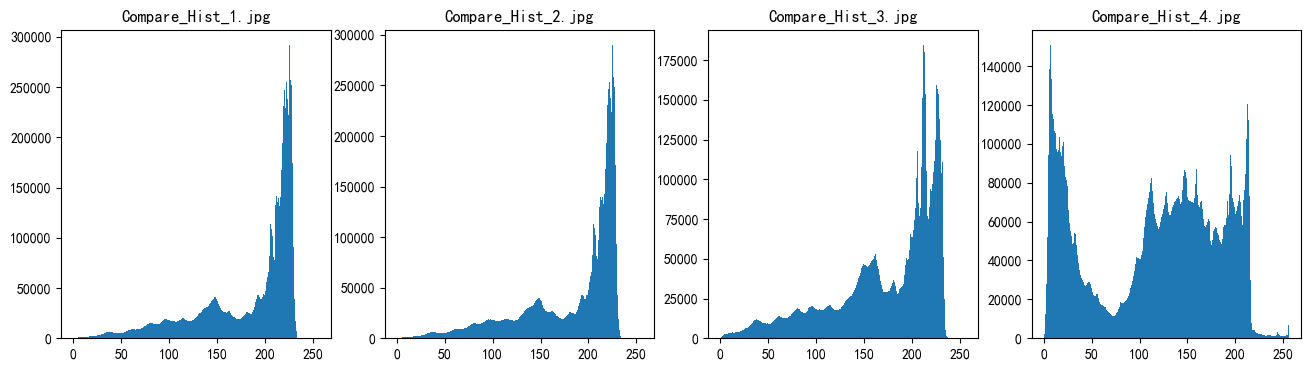

In [10]:
# 读取图片
img1_path = rootpath +'Compare_Hist_1.jpg'
img2_path = rootpath +'Compare_Hist_2.jpg'
img3_path = rootpath +'Compare_Hist_3.jpg'
img4_path = rootpath +'Compare_Hist_4.jpg'
# 绘制直方图
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.title('Compare_Hist_1.jpg')
plt.hist(cv.imread(img1_path, 0).ravel(), 256, [0, 256])
plt.subplot(1, 4, 2)
plt.title('Compare_Hist_2.jpg')
plt.hist(cv.imread(img2_path, 0).ravel(), 256, [0, 256])
plt.subplot(1, 4, 3)
plt.title('Compare_Hist_3.jpg')
plt.hist(cv.imread(img3_path, 0).ravel(), 256, [0, 256])
plt.subplot(1, 4, 4)
plt.title('Compare_Hist_4.jpg')
plt.hist(cv.imread(img4_path, 0).ravel(), 256, [0, 256])

In [11]:
# 前两幅图像的直方图具有相似性，是一幅图像旋转后的结果，而后两幅是完全不相似的图像，因此有不同的直方图
# 打印比较结果
print('图像1和图像2的相似性为%s' % (compare_hist(img1_path, img2_path)))
print('图像1和图像3的相似性为%s' % (compare_hist(img1_path, img3_path)))
print('图像1和图像4的相似性为%s' % (compare_hist(img1_path, img4_path)))
print('图像3和图像4的相似性为%s' % (compare_hist(img3_path, img4_path)))

图像1和图像2的相似性为1.0
图像1和图像3的相似性为0.84
图像1和图像4的相似性为-0.12
图像3和图像4的相似性为0.05
